# 4.1 Data Visualizations

## Contents
### Import libraries and data set
### Orders day of the week (bar chart)
### Prices (histogram)
### Sampling Data
### Prices over days of the week (line chart)
### Orders Hour of Day (histogram)
### Distribution of orders in terms of loyalty_flag (bar chart)
### Prices by hour of day (line chart)
### Customer Age and Family Situation (line chart on age and number of dependants)
### Customer Age and Income (scatterplot)

## Import libraries and latest data set

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
# path to project folder
path = r'/Users/susanwang/Documents/CF_Tasks/Instacart Basket Analysis'

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_all.pkl'))

In [4]:
# check data
ords_prods_merge.head()

,user_id,last_name,gender,state,age,n_dependants,fam_status,income,order_id,order_number,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days,frequency_flag,_merge
0,26711,Esquivel,Female,Missouri,48,3,married,165665,518967,1,...,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Esquivel,Female,Missouri,48,3,married,165665,423547,2,...,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Esquivel,Female,Missouri,48,3,married,165665,2524893,3,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Esquivel,Female,Missouri,48,3,married,165665,2524893,3,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Esquivel,Female,Missouri,48,3,married,165665,2524893,3,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


In [5]:
ords_prods_merge.shape

(32404859, 31)

## Orders day of the week (bar chart)

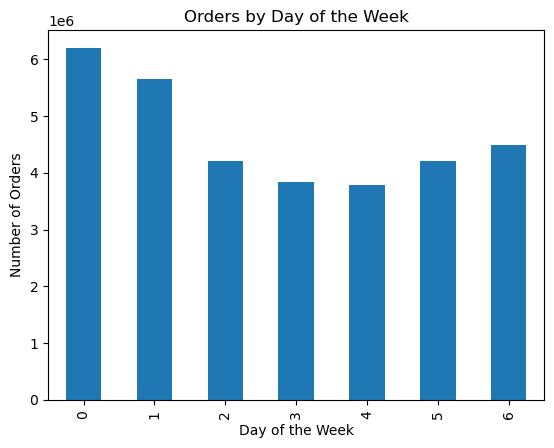

In [13]:
# sort by index
bar = ords_prods_merge['orders_day_of_the_week'].value_counts().sort_index().plot.bar(title='Orders by Day of the Week', xlabel='Day of the Week', ylabel='Number of Orders')

In [14]:
# save bar
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

## Prices (histogram)

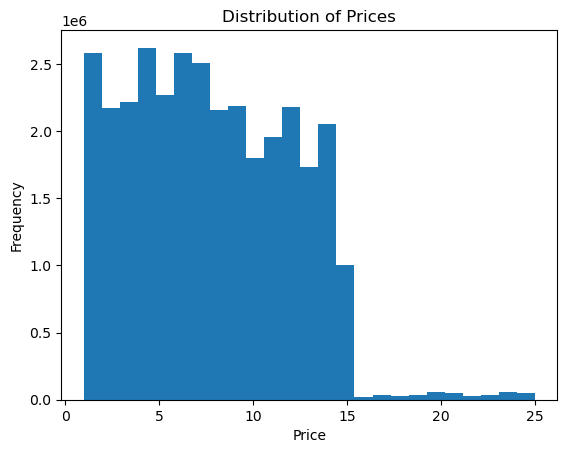

In [17]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25, title='Distribution of Prices', xlabel='Price')

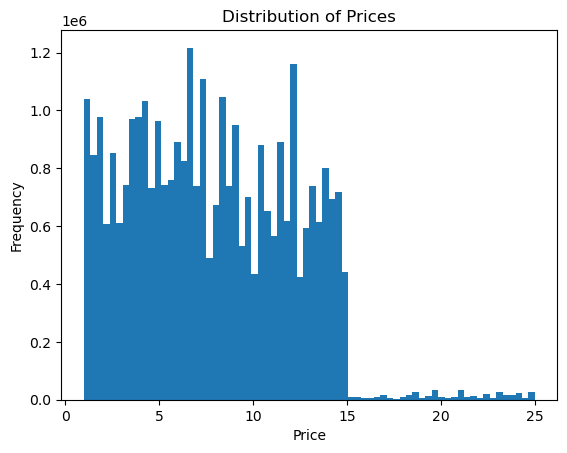

In [18]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70, title='Distribution of Prices', xlabel='Price')

In [19]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

## Sampling Data

In [20]:
# create a seed and list holding TF values
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [21]:
# store 70% of sample in big df
big = ords_prods_merge[dev]

In [22]:
# store 30% of sample in small df
small = ords_prods_merge[~dev]

In [23]:
# check lengths
len(ords_prods_merge)

32404859

In [24]:
len(small) + len(big)

32404859

## Prices over days of the week (line chart)

In [25]:
# reduce sample to only columns needed
df_2 = small[['orders_day_of_the_week', 'prices']]

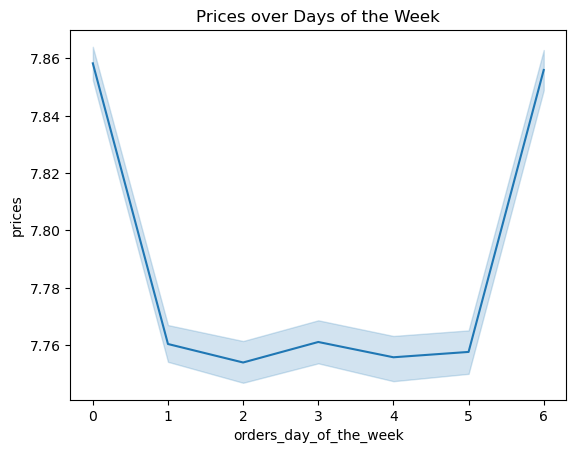

In [33]:
# create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_the_week',y = 'prices').set_title('Prices over Days of the Week')

In [34]:
# export line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_dow_line.png'))

## Orders Hour of Day (histogram)

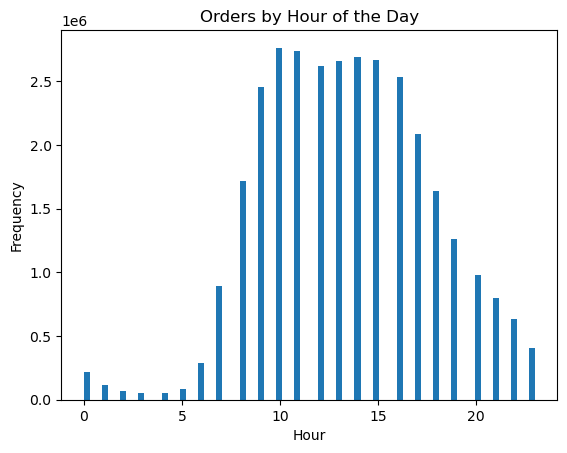

In [35]:
hrs_hist = ords_prods_merge['order_hour_of_day'].plot.hist(bins=75, title='Orders by Hour of the Day', xlabel='Hour')

This histogram shows that there are more orders being made during the early afternoon to afternoon (between 10 am and 4 pm) and very few orders in the early morning hours before dawn. Customers are of course mostly sleeping during the night, and more active during normal business hours. 

In [36]:
# export histogram
hrs_hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hrs_hist.png'))

## Distribution of orders in terms of loyalty_flag (bar chart)

In [37]:
# print distribution
ords_prods_merge['loyalty_flag'].value_counts(dropna=False)

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

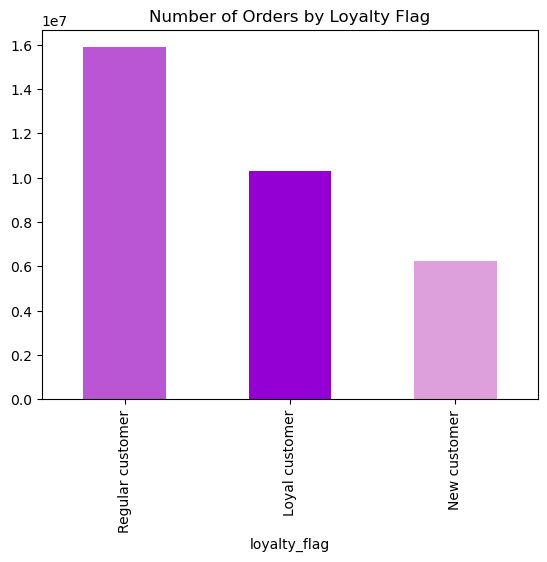

In [38]:
# create bar chart
loyalty_bar = ords_prods_merge['loyalty_flag'].value_counts().plot.bar(color=['mediumorchid', 'darkviolet', 'plum'], title='Number of Orders by Loyalty Flag')

In [40]:
# export chart
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_bar.png'))

## Prices by hour of day (line chart)

In [41]:
# select df of necessary columns from small sample
df_3 = small[['order_hour_of_day', 'prices']]

[Text(0.5, 1.0, 'Prices of Orders by the Hour of the Day'),
 Text(0.5, 0, 'Hour of the Day'),
 Text(0, 0.5, 'Prices')]

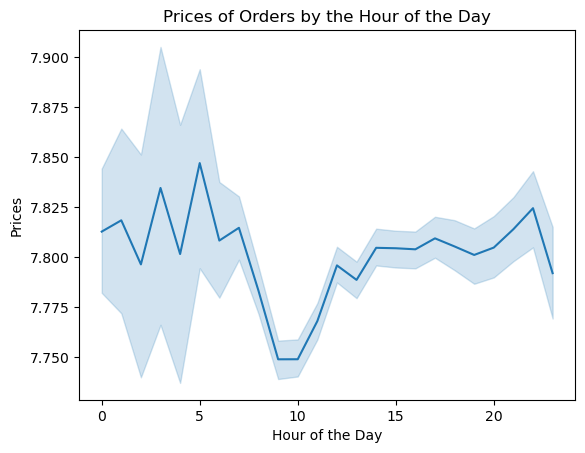

In [45]:
# create line chart
hrs_line = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')
hrs_line.set(title='Prices of Orders by the Hour of the Day', xlabel='Hour of the Day', ylabel='Prices')

In [46]:
# export line chart
hrs_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hrs_prices_line.png'))

## Customer Age and Family Situation (line chart on age and number of dependants)

In [47]:
# reduce sample data to family situation columns
df_family = small[['age', 'n_dependants', 'income']]

[Text(0.5, 1.0, "Customer's Age and Number of Dependants"),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Number of Dependants')]

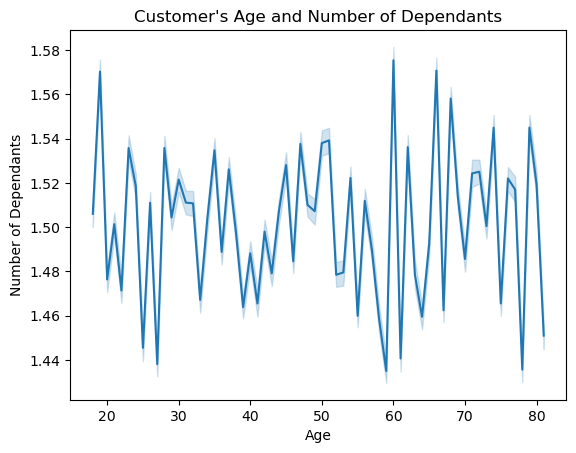

In [48]:
# line chart on age and n_dependants
age_dep_line = sns.lineplot(data=df_family, x='age', y='n_dependants')
age_dep_line.set(title="Customer's Age and Number of Dependants", xlabel="Age", ylabel="Number of Dependants")

This line chart shows us that there doesn't seem to be a definitive relationship between age and family situation (in terms of dependants). The line fluctuates too much, and the values stay between 1.44 and 1.58, which is not a big difference. 

In [49]:
# export line chart
age_dep_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_dep_line.png'))

## Customer Age and Income (scatterplot)

[Text(0.5, 1.0, 'Customer Age and Income'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Income')]

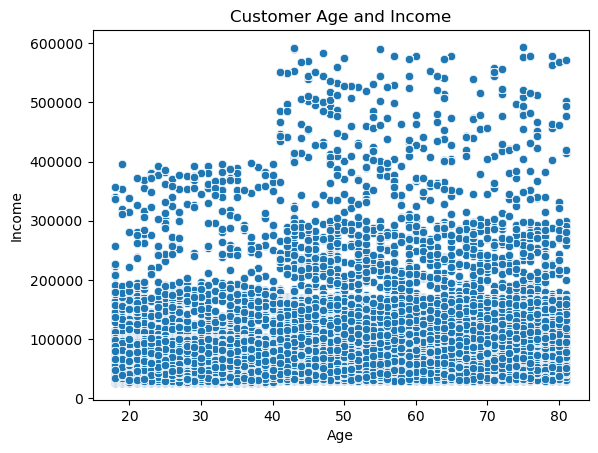

In [50]:
age_inc_scat = sns.scatterplot(x='age', y='income', data=df_family)
age_inc_scat.set(title='Customer Age and Income', xlabel='Age', ylabel='Income')

This scatterplot is shows us that the majority of customers across all ages have an income below 200,000. There are more customers over age 40 who have a higher income between 200,000 and 300,000. And only customers over 40 have very high income between 400,000 and 600,000.

In [51]:
# export figure
age_inc_scat.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_inc_scat.png'))